# Digit Recognizer Machine Learning Model

Greeting's!

In this project we are going to create a machine learning model to recognize hand written digits. For this, we are going to use [this](https://www.kaggle.com/c/digit-recognizer/data) dataset form Kaggle competition. We will use *train.csv* file to train our models and use these models to make predictions on *test.csv* file.

### Overview

We are going to complete following tasks in this project

1. [Import required libraries](#1)
2. [Read data from CSV files](#2)
3. [Data Visualization and Data Pre-Processing](#3)
4. [Build a Machine Learning Model](#4)
 1. [Split our data](#4.1)
 2. [Select a Model](#4.2)
 3. [Export results to a CSV file](#4.3)

## 1. Importing libraries <a id=1></a>

Let's import necessary packages for our project. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

## 2. Reading data from CSV files <a id=2></a>

Let's read our data into pandas dataframe. 

In [2]:
train_path='G:\\Akhilesh\\Coding Projects\\Kaggle\\Digit Recognizer Project\\train.csv'
test_path='G:\\Akhilesh\\Coding Projects\\Kaggle\\Digit Recognizer Project\\test.csv'

train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

## 3. Data Visualization and Data Pre-Processing <a id=3></a>

Now that we have imported our data let us explore this data to get a sense of our data. Let's see the columns names.

In [3]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

As we see our data has 785 columns. First column named 'label' has the digits written by the user. Rest of the 784 columns has the pixel-data of each pixel. As mentioned on the kaggle each image is 28X28 pixels which means 784 pixels per image. Thus we can see that each row has the data for one image. 

Let's see the shape of our data to see the number of rows in our data

In [4]:
print("Shape of training data = "+str(train_df.shape))
print("Shape of test data = "+ str(test_df.shape))

Shape of training data = (42000, 785)
Shape of test data = (28000, 784)


Our train data has 42000 rows,i.e. 42000 images worth of data and our test data has 28000 images data.

Now we will see the first 5 rows of our data.

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observe that our test data has 784 columnns. The 'labels' column is missing from test data. That is because kaggle doesn't provide the labels of the competition datasets. We are going to predict those labels using our models.

Now let us seprate the predictors(X) and targets(Y) in our training data so that we can use them henceforth.

In [7]:
X=train_df.drop('label',axis=1).values
Y=train_df['label']

In [8]:
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


The shape of our targets(Y) is (42000,) but we require the shape to be of the form (m,n). 

Wondering why?
Well that's because we are going to pass it as an argument to the functions that require the arguments to be of the form (m,n).

So let's reshape our targets(Y).

In [9]:
Y=Y.reshape(-1,1)
print(Y.shape)

(42000, 1)


C:\Users\LENOVO\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


Now that we have explored our data let's try to visualise what it represents. We will plot the first 100 rows of our training data using the *imshow()* function from *matplotlib* library. Since *imshow()* function requires an argument of (m,n) shape we will take our row into a variable called *img* and reshape it. Since we want to visualise first 100 rows we will iterate over values (0,99) using a for loop.

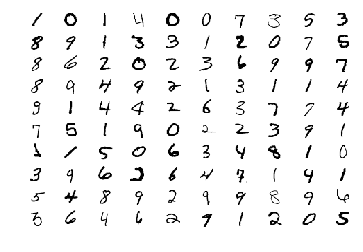

In [10]:
for i in range(100):
    img=X[i,:]
    img=img.reshape(28,-1)
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(img,cmap="Greys")
    
plt.show()
    

We can see first 100 digits represented by first 100 rows.

## 4. Model Building <a id=4></a>

Now that we have explored, visualized and gotten the feel of our data let's move to model building.

### 4.1 Train Test Split <a id=4.1></a>

As we have seen above our test data has the 'label' column missing. So how will we know the accuracy of our model?

To combat this problem we will split our training data into two parts(70%-30%). We will use one part(70%) to train our model and use the other part(30%) to test the accuracy of our model. 

We split our data using *train_test_split()* function from scikit learn library. Notice that we are passing predictors(X) and targets(Y) as arguments to this function. This function requires the data to be of the shape (m,n). Hence, if you recall, we reshaped our targets(Y) above.

In [11]:
# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=21,stratify=Y)

Here:

    X_train contains predictors for our training set
    Y_train contains targets for our training set 
    X_test contains predictors for our test set
    Y_test contains targets for our test set

In [12]:
print(X_train.shape)
print(X_test.shape)

(29400, 784)
(12600, 784)


After spliting our data in 70%-30% we see that now our training set has 29400 rows which will be used to train our model and 12600 rows to test the accuracy of our model.

### 4.2 Model selection<a id=4.2></a>

We will use K-Nearest Neighbors algorithm for making our predictions. Now let's create a *knn* classifier using *KNeighborsClassifier* function from scikit learn library. To choose the optimal value of k (number of neighbors) let's compare the accuracy of our model for k values ranging between (1,9). We will set timers to keep track of time taken for each operation.

C:\Users\LENOVO\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Fit time for k = 1 is 0.125401393572m
Train accuracy time for k = 1 is 16.4718406558m
Test accuracy time for k = 1 is 10.8862705231m
Fit time for k = 2 is 0.127662348747m
Train accuracy time for k = 2 is 25.8026537259m
Test accuracy time for k = 2 is 10.8831629078m
Fit time for k = 3 is 0.121876708666m
Train accuracy time for k = 3 is 25.4036203186m
Test accuracy time for k = 3 is 10.9521975716m
Fit time for k = 4 is 0.121616578102m
Train accuracy time for k = 4 is 25.6694354733m
Test accuracy time for k = 4 is 11.8322874109m
Fit time for k = 5 is 0.131200130781m
Train accuracy time for k = 5 is 26.9054035902m
Test accuracy time for k = 5 is 11.1609151006m
Fit time for k = 6 is 0.147588650386m
Train accuracy time for k = 6 is 26.7985577186m
Test accuracy time for k = 6 is 11.7187580347m
Fit time for k = 7 is 0.158539601167m
Train accuracy time for k = 7 is 25.4349046469m
Test accuracy time for k = 7 is 10.8821183523m
Fit time for k = 8 is 0.12850908041m
Train accuracy time for k = 8 is

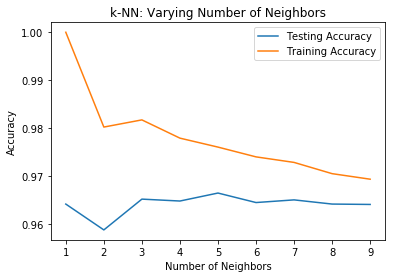

Time for entire cell = 5.414011872741911h


In [13]:
neighbors = np.arange(1, 10)
#Creating empty array of size 9 to hold train and test accuracy for each k value
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Setting up empty arrays to hold time for each operation
fit_time = np.empty(len(neighbors))
train_accuracy_time = np.empty(len(neighbors))
test_accuracy_time = np.empty(len(neighbors))
#Start timer for entire cell
cell_start=time.time()

for i, k in enumerate(neighbors):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    fit_time[i]=time.time()-start
    print("Fit time for k = "+str(k)+ " is "+str(fit_time[i]/60)+ "m")
    train_accuracy[i] = knn.score(X_train,Y_train)
    train_accuracy_time[i]=time.time()-fit_time[i]-start
    print("Train accuracy time for k = "+str(k)+ " is "+str(train_accuracy_time[i]/60)+ "m")
    test_accuracy[i] = knn.score(X_test, Y_test)
    test_accuracy_time[i]=time.time()-train_accuracy_time[i]-fit_time[i]-start
    print("Test accuracy time for k = "+str(k)+ " is "+str(test_accuracy_time[i]/60)+ "m")


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

cell_time=time.time()-cell_start
print("Time for entire cell = "+str(cell_time/3600)+"h")

In [14]:
print(train_accuracy)
print(test_accuracy)

[ 1.          0.98020408  0.98170068  0.97789116  0.97602041  0.97397959
  0.97282313  0.97047619  0.96931973]
[ 0.96412698  0.95873016  0.96515873  0.9647619   0.96642857  0.96444444
  0.965       0.96412698  0.96404762]


As we can see that we get the optimal accuracy around k=5 neighbors. Hence we are going to use this value of k hereafter.

In [15]:
knn=KNeighborsClassifier(n_neighbors=5)

In [16]:
knn.fit(X_train,Y_train)

C:\Users\LENOVO\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Now that we fitted our model let's see the predictions that it makes.

In [17]:
prediction=knn.predict(X_test)

In [23]:
print("Predicted Digits: "+ str(prediction[0:50]))
print("\n Real Digits: " + str(Y_test[0:50].transpose()))

Predicted Digits: [1 7 2 0 0 4 1 9 3 3 2 4 6 7 9 2 9 1 0 9 4 5 7 9 7 0 3 0 8 7 3 6 7 1 9 8 5
 7 8 8 7 3 5 8 1 7 7 7 7 6]

 Real Digits: [[1 7 2 0 0 4 1 9 3 3 8 4 6 7 9 2 9 1 0 9 4 5 7 9 7 0 3 6 8 7 3 6 7 1 9 8 5
  7 8 8 7 3 5 8 1 7 7 7 7 6]]


Just taking the peek at the first 50 predicted digits we can see that our model is highly accurate. The accuracy of our model that we have calculated above is:

In [25]:
print("Accuracy = "+str(test_accuracy[4]))

Accuracy = 0.966428571429


So now that we have trained and evaluated our model,let's apply it to our real test data.

Note:- *Remember that we were working on the training data, that we split [here](#4.1), till now. We haven't touched the real test data yet.*

In [26]:
start=time.time()
prediction_final=knn.predict(test_df)
tot=time.time()-start
print("Time = "+ str(tot/60)+ " m")

Time = 25.951336415608726 m


In [27]:
prediction_final[0:50]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 2, 6, 7], dtype=int64)

We have our final predictions for our real test data. Let's try to compare it with the actual digit images.

C:\Users\LENOVO\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


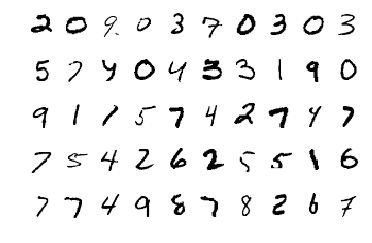

In [28]:
for i in range(50):
    img=test_df.iloc[i,:]
    img=img.reshape(28,-1)
    plt.subplot(5,10,i+1)
    plt.axis('off')
    plt.imshow(img,cmap="Greys")
    
plt.show()
    

### 4.3 Exporting results to a CSV file <a id=4.3></a>

We can see that our model has predicted the digits pretty accurately. Now let's store our predictions to a csv file that can be submitted for the kaggle competition.

In [30]:
prediction_final=prediction_final.reshape(28000,-1)
print(prediction_final.shape)
df=pd.DataFrame(list(range(1,28001)))
df.columns=["ImageId"]
df["Label"]=prediction_final
df.to_csv("Submission2KNN.csv", index=False)
df

(28000, 1)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


This submission has acheived a score of **0.96542** on kaggle. 